In [1]:
import pandas as pd
import statsmodels as ts
from pandas_datareader import data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import datetime
from dotenv import load_dotenv, dotenv_values

In [2]:
load_dotenv('keys.env')

True

In [3]:
import os
alpha = os.environ.get('alpha')

In [4]:
plt.rcParams["figure.figsize"] = (14,7)

# Get Stock Data

In [5]:
import os
alpha = os.getenv('alpha')
alpha

'LNXDD4M6P3VUGUWD'

In [6]:
alpha_vantage_api_key = alpha

In [31]:
start_date = '2018-10-01'
end_date = datetime.datetime.today().strftime('%Y-%m-%d')

# Tickers I am interested in as a Python List
ticker = ['MSFT','AAPL', 'AMZN', 'SPY']

df = web.get_data_yahoo(ticker, start_date, end_date).reorder_levels([1,0], axis=1)

In [32]:
df.head()

Symbols           MSFT       AAPL         AMZN         SPY        MSFT  \
Attributes   Adj Close  Adj Close    Adj Close   Adj Close       Close   
Date                                                                     
2018-10-01  111.730431  55.125626  2004.359985  278.515869  115.610001   
2018-10-02  111.285858  55.615608  1971.310059  278.353485  115.150002   
2018-10-03  111.305183  56.292374  1952.760010  278.506256  115.169998   
2018-10-04  109.005051  55.302704  1909.420044  276.329529  112.790001   
2018-10-05  108.367210  54.405209  1889.650024  274.782898  112.129997   

Symbols          AAPL         AMZN         SPY        MSFT       AAPL  ...  \
Attributes      Close        Close       Close        High       High  ...   
Date                                                                   ...   
2018-10-01  56.814999  2004.359985  291.730011  115.680000  57.355000  ...   
2018-10-02  57.320000  1971.310059  291.559998  115.839996  57.500000  ...   
2018-10-03  58.017502  1952.760010  291.720001  116.180000  58.367500  ...   
2018-10-04  56.997501  1909.420044  289.440002  114.760002  58.087502  ...   
2018-10-05  56.072498  1889.650024  287.820007  113.169998  57.102501  ...   

Symbols            AMZN         SPY        MSFT       AAPL         AMZN  \
Attributes          Low         Low        Open       Open         Open   
Date                                                                      
2018-10-01  2003.599976  290.980011  114.750000  56.987499  2021.989990   
2018-10-02  1965.770020  291.140015  115.300003  56.812500  1999.989990   
2018-10-03  1949.810059  291.320007  115.419998  57.512501  1981.699951   
2018-10-04  1896.569946  287.660004  114.610001  57.695000  1949.000000   
2018-10-05  1862.829956  286.220001  112.629997  56.990002  1917.989990   

Symbols            SPY        MSFT         AAPL       AMZN          SPY  
Attributes        Open      Volume       Volume     Volume       Volume  
Date                                                                     
2018-10-01  292.109985  18883100.0   94403200.0  3460500.0   62078900.0  
2018-10-02  291.559998  20787200.0   99152800.0  5400700.0   47258200.0  
2018-10-03  292.739990  16648000.0  114619200.0  5253100.0   64694600.0  
2018-10-04  291.179993  34821700.0  128168000.0  7257000.0  111545900.0  
2018-10-05  289.690002  29068900.0  134322000.0  6822300.0  105951700.0  

[5 rows x 24 columns]

In [34]:
msft = df.loc[:, 'MSFT']['Close']
aapl = df.loc[:, 'AAPL']['Close']
amzn = df.loc[:, 'AMZN']['Close']
spy = df.loc[:, 'SPY']['Close']

<AxesSubplot:xlabel='Date'>

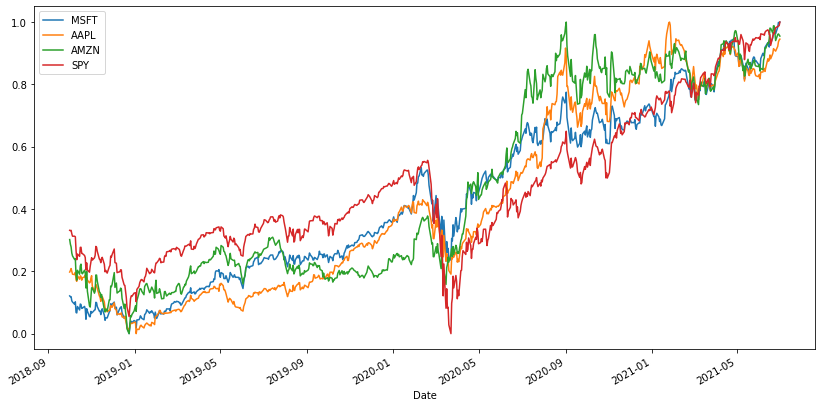

In [39]:
((msft - msft.min())/(msft.max() - msft.min())).plot(label='MSFT', legend=True)
((aapl - aapl.min())/(aapl.max() - aapl.min())).plot(label='AAPL', legend=True)
((amzn - amzn.min())/(amzn.max() - amzn.min())).plot(label='AMZN', legend=True)
((spy - spy.min())/(spy.max() - spy.min())).plot(label='SPY', legend=True)

<AxesSubplot:xlabel='Date'>

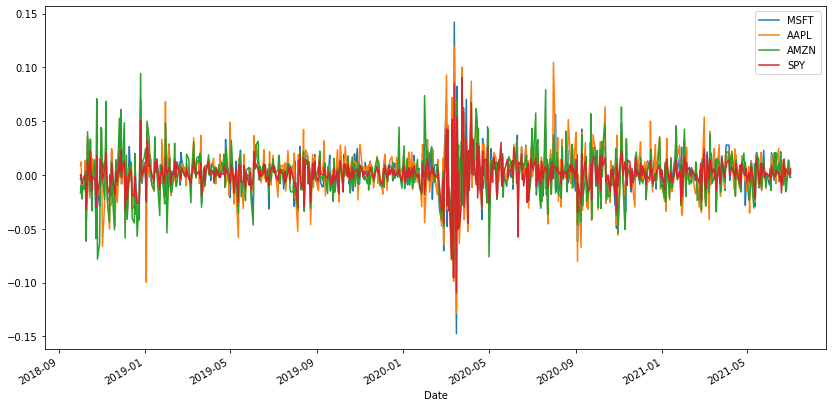

In [46]:
msft.pct_change().plot(label='MSFT', legend=True)
aapl.pct_change().plot(label='AAPL', legend=True)
amzn.pct_change().plot(label='AMZN', legend=True)
spy.pct_change().plot(label='SPY', legend=True)